<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/6_BatchNormalization_Regularization/MNIST_Normalization_and_Regularization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/regularization'
%cd $BASE_DIR
from utils import train, test, model,plot_metrics,helper,data_loader 
import torch

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt


!pip install torchsummary

/content/drive/MyDrive/regularization


## Set the seed for reproducibility

In [2]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)

cuda = torch.cuda.is_available()
if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")


## Download data

In [3]:
train_transforms, test_transforms = data_loader.data_augmentation()
train,test = data_loader.download_mnist_data(train_transforms, test_transforms)

## Dataloader

In [4]:
BATCH_SIZE_GPU = 128
BATCH_SIZE_CPU = 64

dataloader_args = dict(shuffle=True, batch_size=BATCH_SIZE_GPU, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=BATCH_SIZE_CPU)
train_loader, test_loader = data_loader.dataloader(train, test,dataloader_args)

## Variable Initialization

In [5]:
exp_metrics={}
EPOCH=20
dropout=0.03

## Exp1 : LayerNorm with no regularization

In [6]:
experiment_name='LayerNorm'
norm_type='LN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,'LN',l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.3412055969238281 Batch_id=468 Accuracy=63.23: 100%|██████████| 469/469 [00:29<00:00, 15.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2487, Accuracy: 9588/10000 (95.88%)

Epoch 2:


Loss=0.0883597806096077 Batch_id=468 Accuracy=93.63: 100%|██████████| 469/469 [00:30<00:00, 15.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0761, Accuracy: 9809/10000 (98.09%)

Epoch 3:


Loss=0.1490582972764969 Batch_id=468 Accuracy=95.67: 100%|██████████| 469/469 [00:30<00:00, 15.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0607, Accuracy: 9830/10000 (98.30%)

Epoch 4:


Loss=0.1270398646593094 Batch_id=468 Accuracy=96.72: 100%|██████████| 469/469 [00:30<00:00, 15.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0382, Accuracy: 9893/10000 (98.93%)

Epoch 5:


Loss=0.11972054839134216 Batch_id=468 Accuracy=97.13: 100%|██████████| 469/469 [00:30<00:00, 15.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0380, Accuracy: 9897/10000 (98.97%)

Epoch 6:


Loss=0.06719804555177689 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:30<00:00, 15.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9913/10000 (99.13%)

Epoch 7:


Loss=0.09568137675523758 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0251, Accuracy: 9929/10000 (99.29%)

Epoch 8:


Loss=0.09887135028839111 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:30<00:00, 15.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0305, Accuracy: 9909/10000 (99.09%)

Epoch 9:


Loss=0.061207037419080734 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 9924/10000 (99.24%)

Epoch 10:


Loss=0.07722166180610657 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:30<00:00, 15.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9934/10000 (99.34%)

Epoch 11:


Loss=0.06229802966117859 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:30<00:00, 15.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9931/10000 (99.31%)

Epoch 12:


Loss=0.04226600006222725 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:30<00:00, 15.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9938/10000 (99.38%)

Epoch 13:


Loss=0.027177296578884125 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:30<00:00, 15.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9918/10000 (99.18%)

Epoch 14:


Loss=0.01874554343521595 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:30<00:00, 15.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9934/10000 (99.34%)

Epoch 15:


Loss=0.04957147315144539 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:30<00:00, 15.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9931/10000 (99.31%)

Epoch 16:


Loss=0.03954963758587837 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:30<00:00, 15.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9936/10000 (99.36%)

Epoch 17:


Loss=0.11717480421066284 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:30<00:00, 15.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9943/10000 (99.43%)

Epoch 18:


Loss=0.025733910501003265 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:31<00:00, 15.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9945/10000 (99.45%)

Epoch 19:


Loss=0.0043027447536587715 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:31<00:00, 15.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9946/10000 (99.46%)

Epoch 20:


Loss=0.042959123849868774 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:30<00:00, 15.18it/s]



Test set: Average loss: 0.0167, Accuracy: 9947/10000 (99.47%)



## Missclassified Images for Exp1

Total wrong predictions are 53


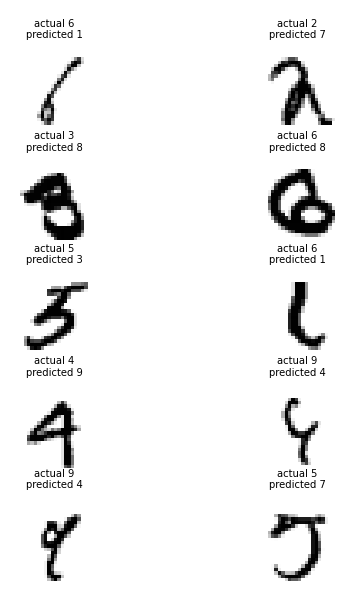

In [7]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp2 : GroupNorm with no regularization

In [8]:
experiment_name='GroupNorm'
norm_type='GN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.5769913792610168 Batch_id=468 Accuracy=55.55: 100%|██████████| 469/469 [00:30<00:00, 15.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4025, Accuracy: 9377/10000 (93.77%)

Epoch 2:


Loss=0.2549133598804474 Batch_id=468 Accuracy=91.11: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1205, Accuracy: 9706/10000 (97.06%)

Epoch 3:


Loss=0.15552324056625366 Batch_id=468 Accuracy=95.05: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0676, Accuracy: 9820/10000 (98.20%)

Epoch 4:


Loss=0.18444927036762238 Batch_id=468 Accuracy=96.28: 100%|██████████| 469/469 [00:30<00:00, 15.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0546, Accuracy: 9848/10000 (98.48%)

Epoch 5:


Loss=0.08971760421991348 Batch_id=468 Accuracy=96.61: 100%|██████████| 469/469 [00:31<00:00, 15.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0386, Accuracy: 9886/10000 (98.86%)

Epoch 6:


Loss=0.08271906524896622 Batch_id=468 Accuracy=97.23: 100%|██████████| 469/469 [00:31<00:00, 14.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0354, Accuracy: 9892/10000 (98.92%)

Epoch 7:


Loss=0.06821821630001068 Batch_id=468 Accuracy=97.22: 100%|██████████| 469/469 [00:31<00:00, 14.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0353, Accuracy: 9892/10000 (98.92%)

Epoch 8:


Loss=0.07268316298723221 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:30<00:00, 15.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0282, Accuracy: 9911/10000 (99.11%)

Epoch 9:


Loss=0.06364897638559341 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:30<00:00, 15.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 9905/10000 (99.05%)

Epoch 10:


Loss=0.03801997750997543 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9921/10000 (99.21%)

Epoch 11:


Loss=0.12826654314994812 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:30<00:00, 15.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9927/10000 (99.27%)

Epoch 12:


Loss=0.03307421877980232 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9924/10000 (99.24%)

Epoch 13:


Loss=0.01104735303670168 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:31<00:00, 15.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 9933/10000 (99.33%)

Epoch 14:


Loss=0.1736108809709549 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 9931/10000 (99.31%)

Epoch 15:


Loss=0.030970163643360138 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9934/10000 (99.34%)

Epoch 16:


Loss=0.05398654565215111 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:30<00:00, 15.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9935/10000 (99.35%)

Epoch 17:


Loss=0.011818245984613895 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9942/10000 (99.42%)

Epoch 18:


Loss=0.03233533725142479 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:31<00:00, 15.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9947/10000 (99.47%)

Epoch 19:


Loss=0.05936478078365326 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:30<00:00, 15.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9947/10000 (99.47%)

Epoch 20:


Loss=0.03868977725505829 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:30<00:00, 15.20it/s]



Test set: Average loss: 0.0182, Accuracy: 9948/10000 (99.48%)



## Model Summary

In [9]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp2

Total wrong predictions are 52


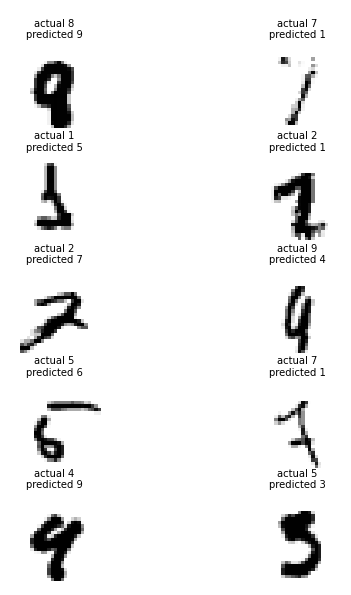

In [10]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp3 : BatchNorm with L1 regularization

In [11]:
experiment_name='BatchNorm+L1'
norm_type='BN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.8783653378486633 Batch_id=468 Accuracy=69.16: 100%|██████████| 469/469 [00:31<00:00, 14.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2044, Accuracy: 9627/10000 (96.27%)

Epoch 2:


Loss=0.5705699920654297 Batch_id=468 Accuracy=93.78: 100%|██████████| 469/469 [00:31<00:00, 14.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0628, Accuracy: 9838/10000 (98.38%)

Epoch 3:


Loss=0.44000300765037537 Batch_id=468 Accuracy=95.50: 100%|██████████| 469/469 [00:31<00:00, 14.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0567, Accuracy: 9825/10000 (98.25%)

Epoch 4:


Loss=0.472772479057312 Batch_id=468 Accuracy=95.84: 100%|██████████| 469/469 [00:31<00:00, 14.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0893, Accuracy: 9728/10000 (97.28%)

Epoch 5:


Loss=0.4135110080242157 Batch_id=468 Accuracy=95.98: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0441, Accuracy: 9866/10000 (98.66%)

Epoch 6:


Loss=0.5614109635353088 Batch_id=468 Accuracy=96.17: 100%|██████████| 469/469 [00:31<00:00, 15.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0737, Accuracy: 9762/10000 (97.62%)

Epoch 7:


Loss=0.3541531562805176 Batch_id=468 Accuracy=96.20: 100%|██████████| 469/469 [00:31<00:00, 14.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0697, Accuracy: 9781/10000 (97.81%)

Epoch 8:


Loss=0.4859565496444702 Batch_id=468 Accuracy=96.39: 100%|██████████| 469/469 [00:31<00:00, 14.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0640, Accuracy: 9774/10000 (97.74%)

Epoch 9:


Loss=0.5052157640457153 Batch_id=468 Accuracy=96.38: 100%|██████████| 469/469 [00:31<00:00, 14.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0583, Accuracy: 9815/10000 (98.15%)

Epoch 10:


Loss=0.3636178970336914 Batch_id=468 Accuracy=96.42: 100%|██████████| 469/469 [00:31<00:00, 15.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0420, Accuracy: 9874/10000 (98.74%)

Epoch 11:


Loss=0.44095849990844727 Batch_id=468 Accuracy=96.60: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0408, Accuracy: 9868/10000 (98.68%)

Epoch 12:


Loss=0.2983017563819885 Batch_id=468 Accuracy=96.62: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0490, Accuracy: 9841/10000 (98.41%)

Epoch 13:


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0517, Accuracy: 9827/10000 (98.27%)

Epoch 14:


Loss=0.42917823791503906 Batch_id=468 Accuracy=96.89: 100%|██████████| 469/469 [00:30<00:00, 15.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0386, Accuracy: 9868/10000 (98.68%)

Epoch 15:


Loss=0.4385332763195038 Batch_id=468 Accuracy=97.03: 100%|██████████| 469/469 [00:31<00:00, 14.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 9880/10000 (98.80%)

Epoch 16:


Loss=0.3077714443206787 Batch_id=468 Accuracy=97.12: 100%|██████████| 469/469 [00:31<00:00, 15.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0348, Accuracy: 9893/10000 (98.93%)

Epoch 17:


Loss=0.25330764055252075 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:31<00:00, 15.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9917/10000 (99.17%)

Epoch 18:


Loss=0.22641141712665558 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:31<00:00, 14.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9907/10000 (99.07%)

Epoch 19:


Loss=0.24644801020622253 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:31<00:00, 15.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9941/10000 (99.41%)

Epoch 20:


Loss=0.20483161509037018 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:31<00:00, 14.97it/s]



Test set: Average loss: 0.0190, Accuracy: 9941/10000 (99.41%)



## Model Summary

In [12]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp3

Total wrong predictions are 59


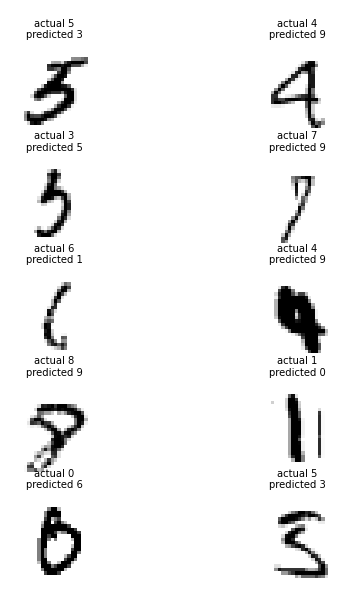

In [13]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp4 : GroupNorm with L1 regularization

In [14]:
experiment_name='GroupNorm+L1'
norm_type='GN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=1.1249425411224365 Batch_id=468 Accuracy=60.57: 100%|██████████| 469/469 [00:31<00:00, 15.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.3576, Accuracy: 9440/10000 (94.40%)

Epoch 2:


Loss=0.543440580368042 Batch_id=468 Accuracy=91.82: 100%|██████████| 469/469 [00:31<00:00, 15.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1082, Accuracy: 9743/10000 (97.43%)

Epoch 3:


Loss=0.563041627407074 Batch_id=468 Accuracy=94.78: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0636, Accuracy: 9840/10000 (98.40%)

Epoch 4:


Loss=0.6575402021408081 Batch_id=468 Accuracy=95.22: 100%|██████████| 469/469 [00:30<00:00, 15.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0853, Accuracy: 9741/10000 (97.41%)

Epoch 5:


Loss=0.4897747039794922 Batch_id=468 Accuracy=95.62: 100%|██████████| 469/469 [00:31<00:00, 15.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0644, Accuracy: 9830/10000 (98.30%)

Epoch 6:


Loss=0.41548988223075867 Batch_id=468 Accuracy=95.55: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0692, Accuracy: 9810/10000 (98.10%)

Epoch 7:


Loss=0.4855272173881531 Batch_id=468 Accuracy=96.07: 100%|██████████| 469/469 [00:31<00:00, 15.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0716, Accuracy: 9800/10000 (98.00%)

Epoch 8:


Loss=0.39995473623275757 Batch_id=468 Accuracy=96.00: 100%|██████████| 469/469 [00:30<00:00, 15.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0559, Accuracy: 9842/10000 (98.42%)

Epoch 9:


Loss=0.5362233519554138 Batch_id=468 Accuracy=96.14: 100%|██████████| 469/469 [00:30<00:00, 15.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0663, Accuracy: 9814/10000 (98.14%)

Epoch 10:


Loss=0.47002387046813965 Batch_id=468 Accuracy=96.29: 100%|██████████| 469/469 [00:31<00:00, 15.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0724, Accuracy: 9796/10000 (97.96%)

Epoch 11:


Loss=0.3944047689437866 Batch_id=468 Accuracy=96.29: 100%|██████████| 469/469 [00:30<00:00, 15.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0618, Accuracy: 9838/10000 (98.38%)

Epoch 12:


Loss=0.34609395265579224 Batch_id=468 Accuracy=96.48: 100%|██████████| 469/469 [00:30<00:00, 15.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0540, Accuracy: 9846/10000 (98.46%)

Epoch 13:


Loss=0.39022910594940186 Batch_id=468 Accuracy=96.41: 100%|██████████| 469/469 [00:30<00:00, 15.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0549, Accuracy: 9847/10000 (98.47%)

Epoch 14:


Loss=0.34447264671325684 Batch_id=468 Accuracy=96.82: 100%|██████████| 469/469 [00:30<00:00, 15.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0588, Accuracy: 9835/10000 (98.35%)

Epoch 15:


Loss=0.3857063949108124 Batch_id=468 Accuracy=96.87: 100%|██████████| 469/469 [00:30<00:00, 15.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0438, Accuracy: 9876/10000 (98.76%)

Epoch 16:


Loss=0.29172998666763306 Batch_id=468 Accuracy=97.02: 100%|██████████| 469/469 [00:30<00:00, 15.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0447, Accuracy: 9890/10000 (98.90%)

Epoch 17:


Loss=0.35616254806518555 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:30<00:00, 15.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 9891/10000 (98.91%)

Epoch 18:


Loss=0.3624235987663269 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:31<00:00, 15.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9905/10000 (99.05%)

Epoch 19:


Loss=0.2719317078590393 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:30<00:00, 15.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 9932/10000 (99.32%)

Epoch 20:


Loss=0.24009191989898682 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:31<00:00, 15.07it/s]



Test set: Average loss: 0.0254, Accuracy: 9932/10000 (99.32%)



## Model Summary

In [15]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp4

Total wrong predictions are 68


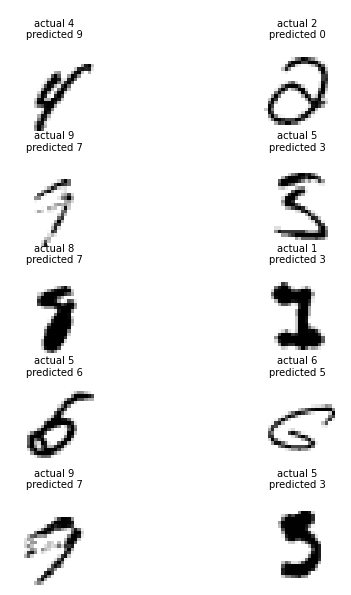

In [16]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp5 : LayerNorm with L2 regularization

In [17]:
experiment_name='LayerNorm+L2'
norm_type='LN'
l1_factor=0
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.35279181599617004 Batch_id=468 Accuracy=64.04: 100%|██████████| 469/469 [00:30<00:00, 15.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2663, Accuracy: 9535/10000 (95.35%)

Epoch 2:


Loss=0.25070133805274963 Batch_id=468 Accuracy=92.84: 100%|██████████| 469/469 [00:30<00:00, 15.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0882, Accuracy: 9777/10000 (97.77%)

Epoch 3:


Loss=0.13774718344211578 Batch_id=468 Accuracy=95.83: 100%|██████████| 469/469 [00:30<00:00, 15.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0541, Accuracy: 9841/10000 (98.41%)

Epoch 4:


Loss=0.034178223460912704 Batch_id=468 Accuracy=96.72: 100%|██████████| 469/469 [00:30<00:00, 15.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0459, Accuracy: 9868/10000 (98.68%)

Epoch 5:


Loss=0.04933685064315796 Batch_id=468 Accuracy=97.12: 100%|██████████| 469/469 [00:30<00:00, 15.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 9877/10000 (98.77%)

Epoch 6:


Loss=0.057955801486968994 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:30<00:00, 15.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9909/10000 (99.09%)

Epoch 7:


Loss=0.08425817638635635 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:30<00:00, 15.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9908/10000 (99.08%)

Epoch 8:


Loss=0.07941324263811111 Batch_id=468 Accuracy=97.69: 100%|██████████| 469/469 [00:30<00:00, 15.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9910/10000 (99.10%)

Epoch 9:


Loss=0.07125212252140045 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:30<00:00, 15.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9932/10000 (99.32%)

Epoch 10:


Loss=0.08055242151021957 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0309, Accuracy: 9901/10000 (99.01%)

Epoch 11:


Loss=0.2042592614889145 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:30<00:00, 15.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9906/10000 (99.06%)

Epoch 12:


Loss=0.06987112015485764 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:30<00:00, 15.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9923/10000 (99.23%)

Epoch 13:


Loss=0.05704575404524803 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:30<00:00, 15.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0289, Accuracy: 9922/10000 (99.22%)

Epoch 14:


Loss=0.023936385288834572 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:30<00:00, 15.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0308, Accuracy: 9916/10000 (99.16%)

Epoch 15:


Loss=0.027551807463169098 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:30<00:00, 15.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Accuracy: 9917/10000 (99.17%)

Epoch 16:


Loss=0.10518106073141098 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:30<00:00, 15.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9937/10000 (99.37%)

Epoch 17:


Loss=0.015574404038488865 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:30<00:00, 15.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9929/10000 (99.29%)

Epoch 18:


Loss=0.042329806834459305 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:30<00:00, 15.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9939/10000 (99.39%)

Epoch 19:


Loss=0.0629284679889679 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:30<00:00, 15.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9949/10000 (99.49%)

Epoch 20:


Loss=0.03020402044057846 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:30<00:00, 15.35it/s]



Test set: Average loss: 0.0199, Accuracy: 9949/10000 (99.49%)



## Missclassified Images for Exp5

---



Total wrong predictions are 51


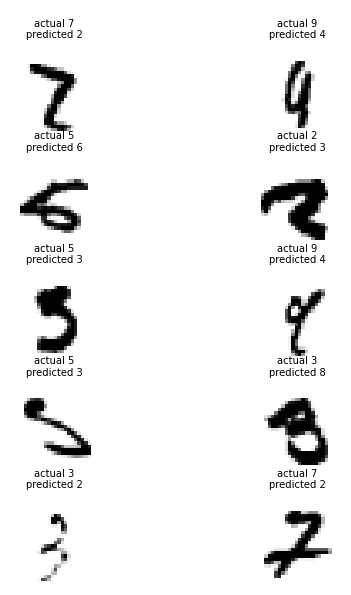

In [18]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp6 : BatchNorm with L1 and L2 regularization

In [19]:
experiment_name='BatchNorm+L1+L2'
norm_type='BN'
l1_factor=0.001
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1:


Loss=0.8811053037643433 Batch_id=468 Accuracy=73.00: 100%|██████████| 469/469 [00:30<00:00, 15.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2038, Accuracy: 9566/10000 (95.66%)

Epoch 2:


Loss=0.6867669820785522 Batch_id=468 Accuracy=93.13: 100%|██████████| 469/469 [00:30<00:00, 15.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0819, Accuracy: 9754/10000 (97.54%)

Epoch 3:


Loss=0.4994896650314331 Batch_id=468 Accuracy=95.04: 100%|██████████| 469/469 [00:31<00:00, 15.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0646, Accuracy: 9822/10000 (98.22%)

Epoch 4:


Loss=0.4465895891189575 Batch_id=468 Accuracy=95.82: 100%|██████████| 469/469 [00:30<00:00, 15.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0605, Accuracy: 9822/10000 (98.22%)

Epoch 5:


Loss=0.399551123380661 Batch_id=468 Accuracy=95.81: 100%|██████████| 469/469 [00:30<00:00, 15.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1396, Accuracy: 9596/10000 (95.96%)

Epoch 6:


Loss=0.5294690728187561 Batch_id=468 Accuracy=96.05: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0559, Accuracy: 9840/10000 (98.40%)

Epoch 7:


Loss=0.3710833787918091 Batch_id=468 Accuracy=96.14: 100%|██████████| 469/469 [00:30<00:00, 15.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0496, Accuracy: 9847/10000 (98.47%)

Epoch 8:


Loss=0.3800170123577118 Batch_id=468 Accuracy=96.34: 100%|██████████| 469/469 [00:30<00:00, 15.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0488, Accuracy: 9849/10000 (98.49%)

Epoch 9:


Loss=0.42758801579475403 Batch_id=468 Accuracy=96.23: 100%|██████████| 469/469 [00:30<00:00, 15.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0476, Accuracy: 9849/10000 (98.49%)

Epoch 10:


Loss=0.38459259271621704 Batch_id=468 Accuracy=96.34: 100%|██████████| 469/469 [00:31<00:00, 15.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0650, Accuracy: 9794/10000 (97.94%)

Epoch 11:


Loss=0.36445850133895874 Batch_id=468 Accuracy=96.42: 100%|██████████| 469/469 [00:31<00:00, 15.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0369, Accuracy: 9881/10000 (98.81%)

Epoch 12:


Loss=0.3406001329421997 Batch_id=468 Accuracy=96.52: 100%|██████████| 469/469 [00:30<00:00, 15.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0523, Accuracy: 9860/10000 (98.60%)

Epoch 13:


Loss=0.2716681957244873 Batch_id=468 Accuracy=96.58: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0463, Accuracy: 9870/10000 (98.70%)

Epoch 14:


Loss=0.3138701915740967 Batch_id=468 Accuracy=96.60: 100%|██████████| 469/469 [00:30<00:00, 15.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0455, Accuracy: 9863/10000 (98.63%)

Epoch 15:


Loss=0.46567803621292114 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0578, Accuracy: 9831/10000 (98.31%)

Epoch 16:


Loss=0.3110632300376892 Batch_id=468 Accuracy=97.05: 100%|██████████| 469/469 [00:30<00:00, 15.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 9882/10000 (98.82%)

Epoch 17:


Loss=0.30052489042282104 Batch_id=468 Accuracy=97.31: 100%|██████████| 469/469 [00:30<00:00, 15.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0388, Accuracy: 9887/10000 (98.87%)

Epoch 18:


Loss=0.20485393702983856 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:30<00:00, 15.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9930/10000 (99.30%)

Epoch 19:


Loss=0.24875223636627197 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:30<00:00, 15.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9938/10000 (99.38%)

Epoch 20:


Loss=0.23047542572021484 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:30<00:00, 15.16it/s]



Test set: Average loss: 0.0205, Accuracy: 9942/10000 (99.42%)



## Missclassified Images for Exp6

---



Total wrong predictions are 58


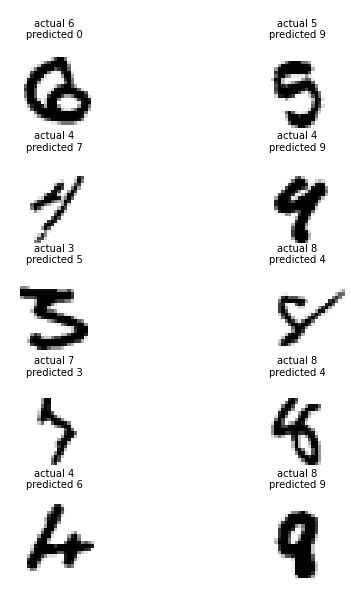

In [20]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Plot Metrics for all Experiments

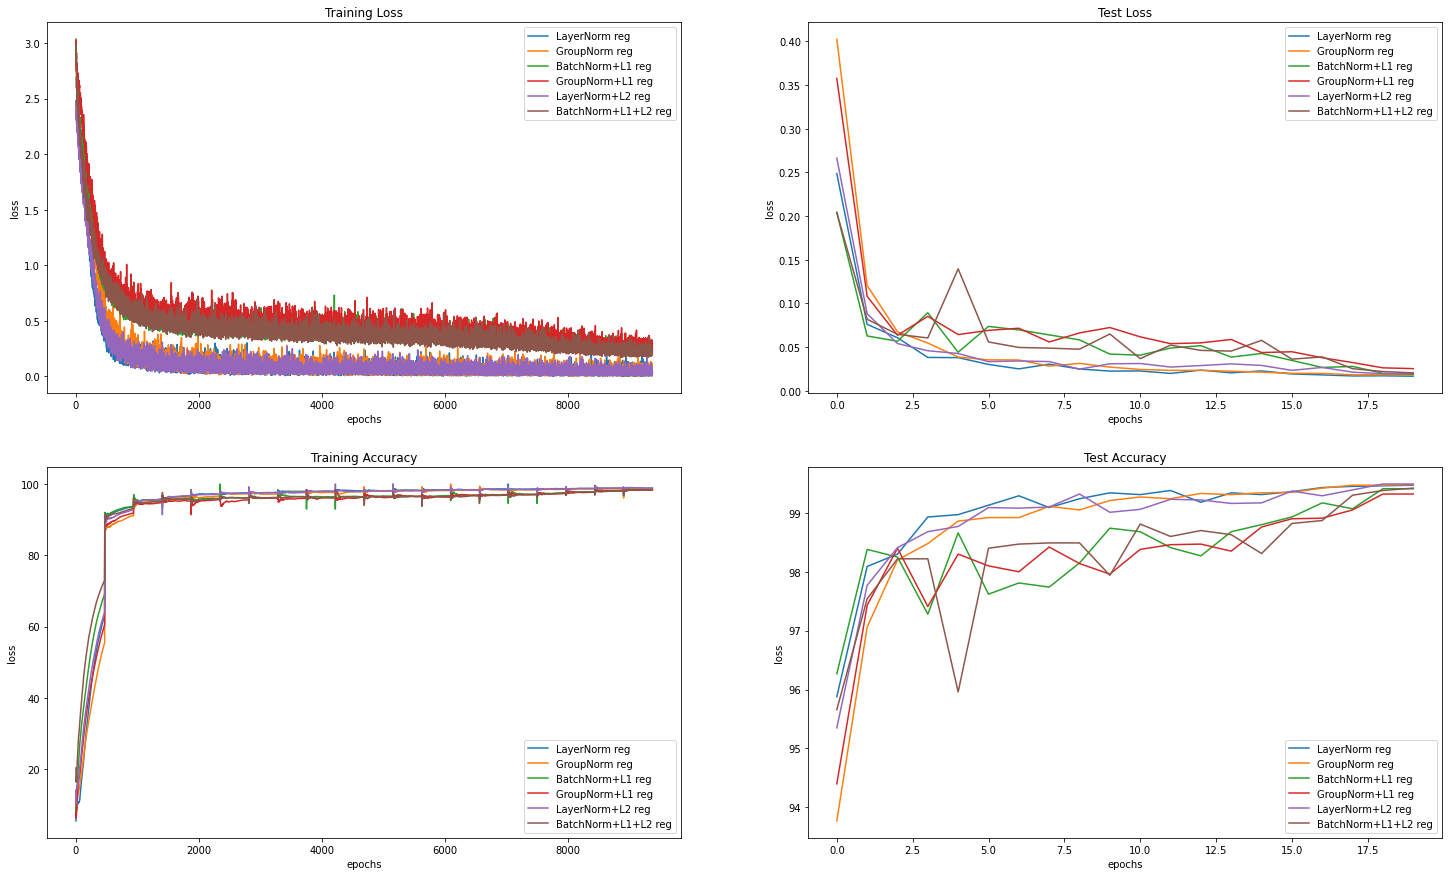

In [21]:
plot_metrics.plot_metrics(exp_metrics)